# Libraries

In [1]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings
import os
import plotly.express as px

# 📊 Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

# 🔧 Basic functions
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]



---



#00 | Data Extraction


In [2]:
os.listdir()

['.config', 'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'sample_data']

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df = data.copy() # Making security copy

In [5]:
snake_columns(df) # Cleaning columns snake_type



---



# 01 | About Dataset

## Context

The `Telco Customer Churn` dataset allows us to understand and predict customer behavior, helping us keep customers satisfied and loyal. By examining various customer data points, we can identify patterns and insights that inform targeted retention strategies. This dataset enables us to analyze factors influencing churn and develop tailored retention programs, ensuring the continued satisfaction and loyalty of our customers.


---


**Customer Churn:** (Meaning & Value) Customer churn is a term used to describe whether a customer is leaving or not a product or service. It's very important for companies to analyze and assess customer retention factors.


---




`Data Source:` [Kaggle link ](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)


## Data Features

* **`customerid`**: Customer identification number.
* **`gender`**: Whether the customer is male or female.
* **`seniorcitizen`**: 0 if the customer is under 65 years old, or 1 if they are 65 or older.
* **`partner`**: Whether the customer has a partner (Yes or No).
* **`dependents`**: Whether the customer has dependents (Yes, No) such as children, parents, grandparents, etc.
* **`tenure`**: Number of months the customer has stayed with the company.
* **`phoneservice`**: Whether the customer has a phone service (Yes, No).
* **`multiplelines`**: Whether the customer has multiple lines (Yes, No, No phone service).
* **`internetservice`**: Customer’s internet service provider (DSL, Fiber optic, No).
* **`onlinesecurity`**: Whether the customer has online security (Yes, No, No internet service).
* **`onlinebackup`**: Whether the customer has online backup (Yes, No, No internet service).
* **`deviceprotection`**: Whether the customer has device protection (Yes, No, No internet service).
* **`techsupport`**: Whether the customer has tech support (Yes, No, No internet service).
* **`streamingtv`**: Whether the customer has streaming TV (Yes, No, No internet service).
* **`streamingmovies`**: Whether the customer has streaming movies (Yes, No, No internet service).
* **`contract`**: Customer’s current contract type: Month-to-Month, One Year, Two Year.
* **`paperlessbilling`**: Whether the customer has paperless billing (Yes, No).
* **`paymentmethod`**: How the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.
* **`monthlycharges`**: Customer’s current total monthly charge for all services.
* **`totalcharges`**: Customer’s total charges up to the end of the specified quarter.
* **`churn`**: 1 if the customer left the company (Churn=Yes) and 0 if they remained (Churn=No) based in last quarter.





---



# 02 | Data Exploration


In [6]:
rows, columns = df.shape

In [7]:
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {columns}')

Number of Rows: 7043
Number of Columns: 21


In [8]:
df.dtypes # Most of the data are 'obejct'

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes




---



# 03 | Data Cleaning

## Setting Customer ID as Index

In [10]:
# Checking duplicates in customer id
df.customerid.duplicated().sum()

0

In [11]:
# Setting customer id as Index:
df.set_index('customerid', inplace=True)



---



## Dropping Duplicates

In [12]:
# Cheking duplicates:
df.duplicated().sum()

22

In [13]:
# Dropping duplicates:
df = df.drop_duplicates()

In [14]:
# Cheking duplicates again after drop:
df.duplicated().sum()

0



---



## Checking for Null & Empty Values

In [15]:
df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No null values so all corect.

In [16]:
df.eq(" ").sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

We have 11 empty spaces in `totalcharge` so lets explore and fix those empty spaces.

In [17]:
# Checking [totalcahrges] rows with empty values:
empty_totalcharges_rows = df[df.totalcharges== " "]
empty_totalcharges_rows.head(4)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Fixing: `totalcharges`

**Observation:** `totalcharges` are empty when `tenure` is equal to zero,  which might mean that customer just started so doesn't have a 'total charge' bill just yet as the its his/her first quarter being billed.

**Solution:** We'll replace empty spaces in `totalcharges` for `0`

In [18]:
# Replacing empty spaces in [totalcahrges] for zero's:
df.totalcharges = df.totalcharges.replace(" ", "0")

In [19]:
# Cheking that now we have zero 'empty' values in our dataset:
df.eq(" ").sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Now our dataset is clean with no Null now Empty values.



---



# 04 | Looking for Correlations


In this section we'll look for potential correlations between columns applying different methods.

In [20]:
df.dtypes # Most of columns are 'object' type

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

### Changing `Categoricals` to `Numericals`

In order to create a heatmap to find correlations, we first have to change all the columns to numerical, as they are currently mostly of `object` type. However, they could be mapped to dummy variables or converted to numerical values with a three-value mapping.

In [21]:
# Creating a new Dataframe [df_2] to not change [df]:
df_2 = df.copy()

Demographic Columns Mapping:

In [22]:
# Demographic columns mapping:
gender_map = {'Male': 0, 'Female': 1}
partner_map = {'No': 0, 'Yes': 1}
dependents_map = {'No': 0, 'Yes': 1}

# Applying the mapping to the demographic columns:
df_2.gender = df_2.gender.map(gender_map)
df_2.partner = df_2.partner.map(partner_map)
df_2.dependents = df_2.dependents.map(dependents_map)

Technical / Service Columns Mapping:

In [23]:
# Technical / Service columns mapping:
phoneservice_map = {'No': 0, 'Yes': 1}
multiplelines_map = {'No phone service': 0, 'No': 0.5, 'Yes': 1}
internetservice_map = {'No': 0, 'DSL': 0.5, 'Fiber optic': 1}
service_map = {'No internet service': 0, 'No': 0.5, 'Yes': 1}

# Applying the mappings to respective columns:
df_2.phoneservice = df_2.phoneservice.map(phoneservice_map)
df_2.multiplelines = df_2.multiplelines.map(multiplelines_map)
df_2.internetservice = df_2.internetservice.map(internetservice_map)
df_2.onlinesecurity = df_2.onlinesecurity.map(service_map)
df_2.onlinebackup = df_2.onlinebackup.map(service_map)
df_2.deviceprotection = df_2.deviceprotection.map(service_map)
df_2.techsupport = df_2.techsupport.map(service_map)
df_2.streamingtv = df_2.streamingtv.map(service_map)
df_2.streamingmovies = df_2.streamingmovies.map(service_map)

Payment and Churn Columns Mapping:

In [24]:
# Payment columns mapping:
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
billing_map = {'No': 0, 'Yes': 1}
payment_map = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
churn_map = {'No': 0, 'Yes': 1}

# Applying the mappings to respective columns:
df_2.contract = df_2.contract.map(contract_map)
df_2.paperlessbilling = df_2.paperlessbilling.map(billing_map)
df_2.paymentmethod = df_2.paymentmethod.map(payment_map)
df_2.churn = df_2.churn.map(churn_map)

## Heatmap

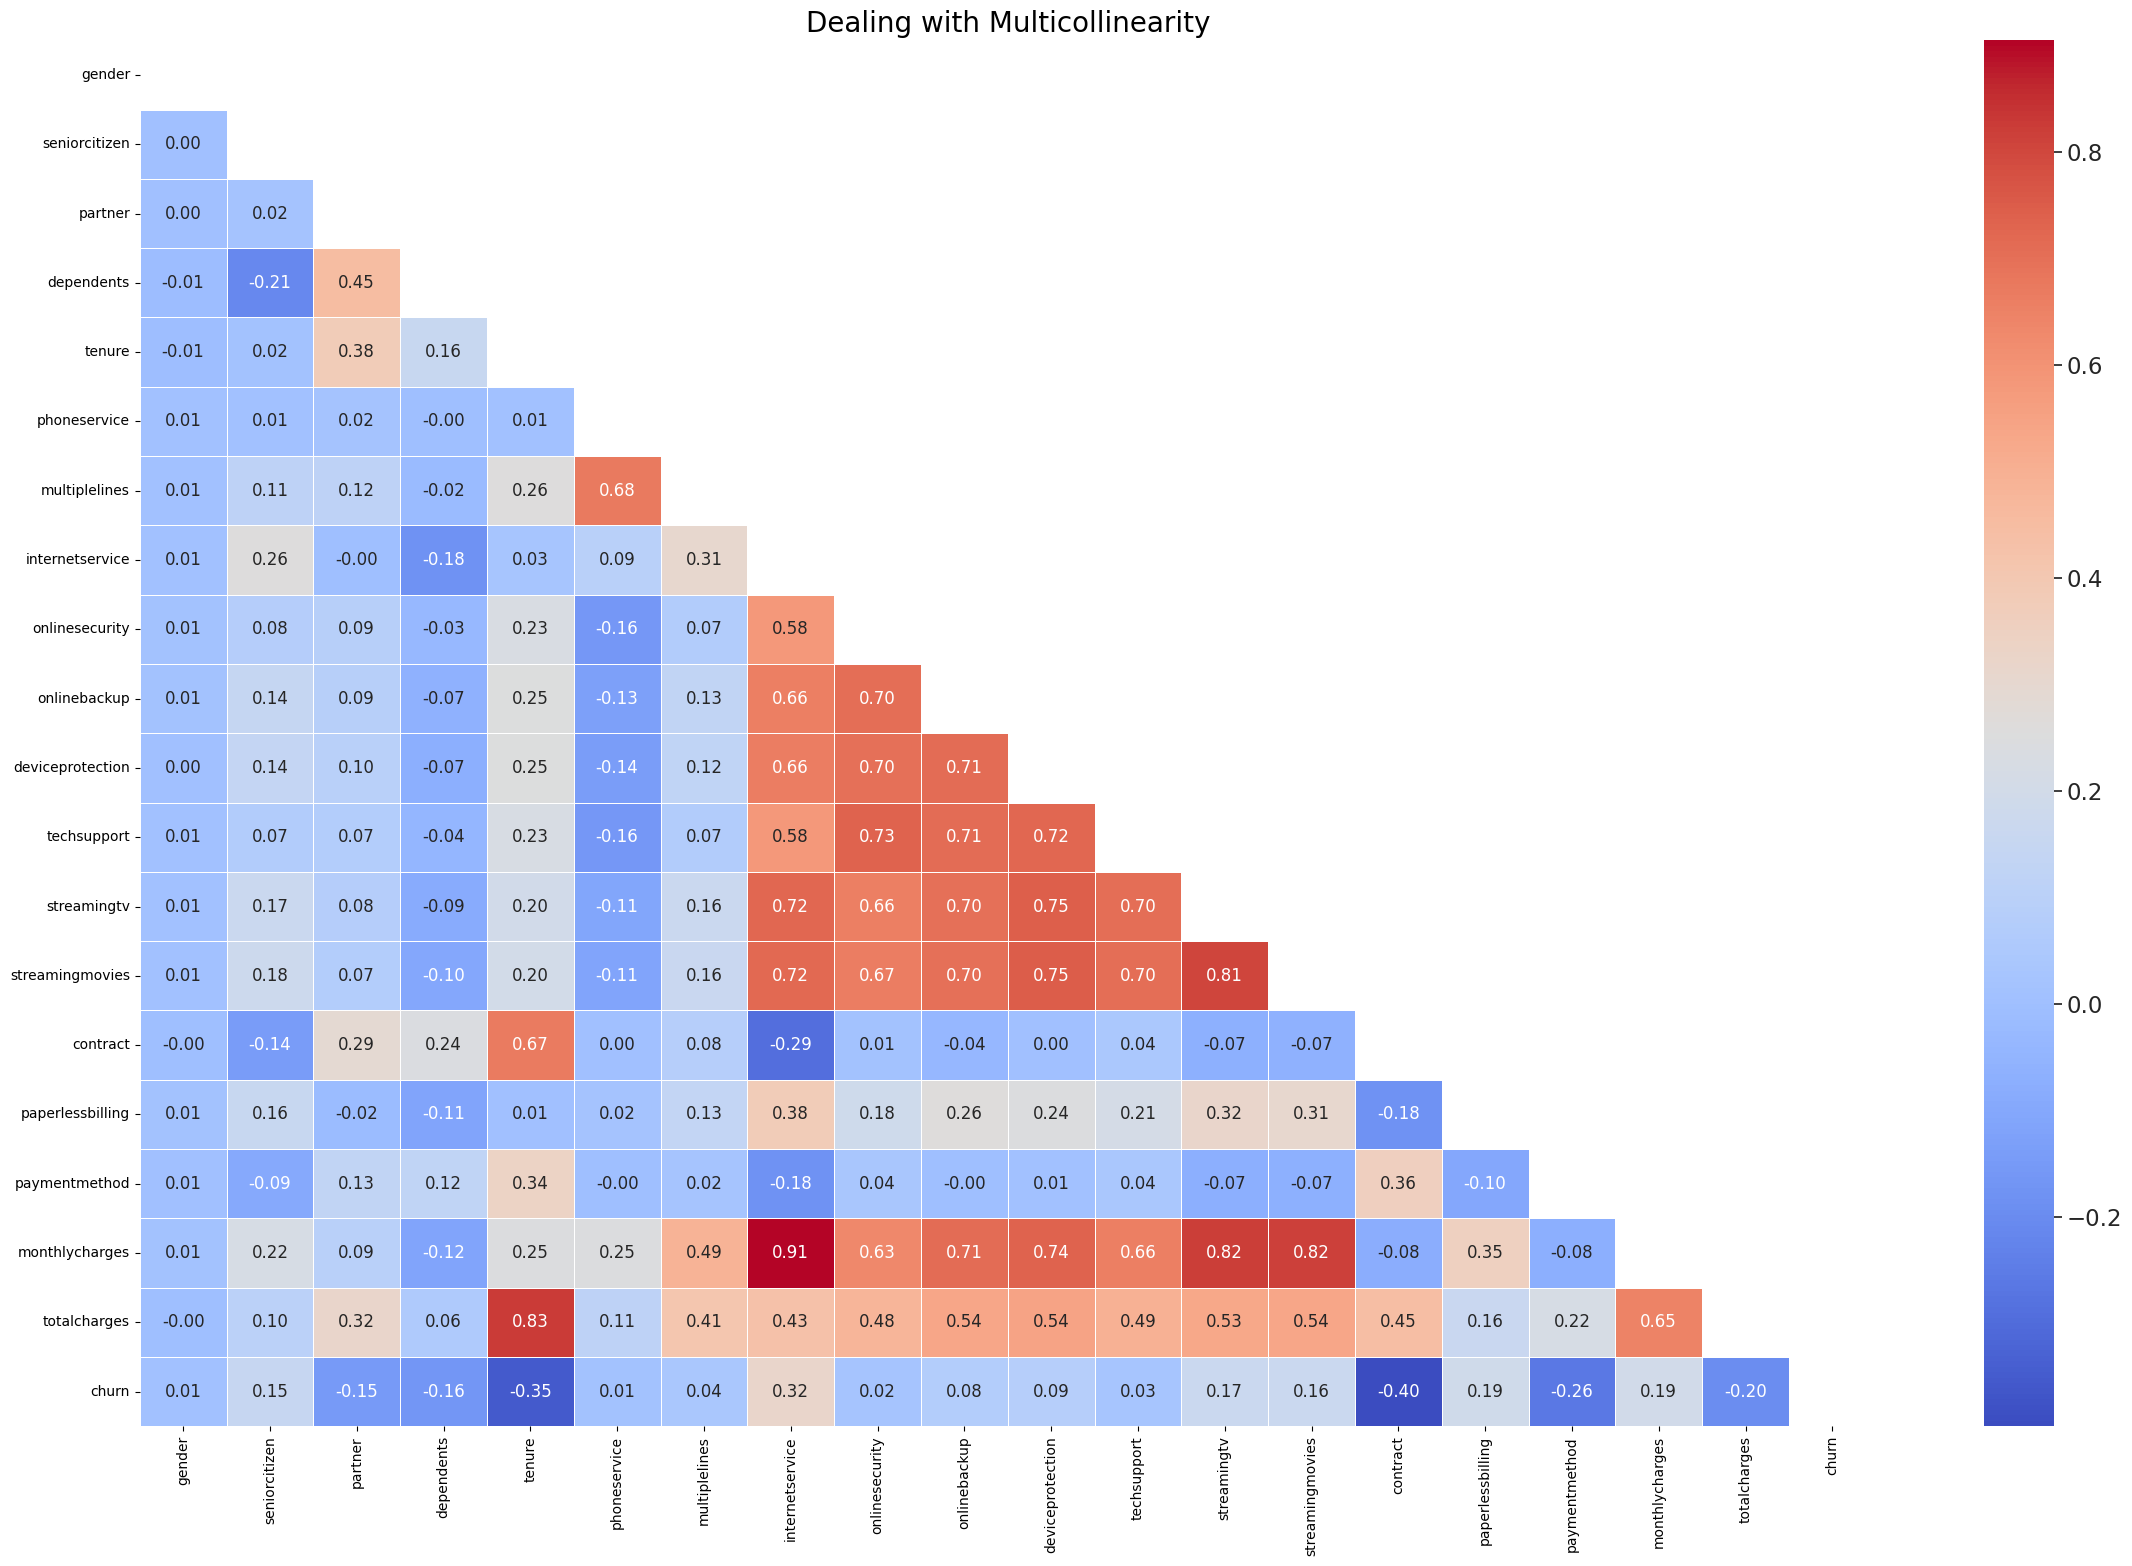

In [25]:
# Compute the correlation matrix
num_corr = df_2.corr()

# Create a mask to hide the upper triangle for aesthetics
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap
f, ax = plt.subplots(figsize=(28, 18))
sns.set(font_scale=1.5) # Increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20) # Add title
plt.show()

In [26]:
# Creating the df back to df_2 where all are numerical for ml models:
df = df_2.copy()

In [27]:
df.dtypes

gender                int64
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines       float64
internetservice     float64
onlinesecurity      float64
onlinebackup        float64
deviceprotection    float64
techsupport         float64
streamingtv         float64
streamingmovies     float64
contract              int64
paperlessbilling      int64
paymentmethod         int64
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [28]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,0.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0,1,0,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,0.5,0.5,1.0,0.5,1.0,0.5,0.5,0.5,1,0,1,56.95,1889.5,0
3668-QPYBK,0,0,0,0,2,1,0.5,0.5,1.0,1.0,0.5,0.5,0.5,0.5,0,1,1,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,0.0,0.5,1.0,0.5,1.0,1.0,0.5,0.5,1,0,2,42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0,1,0,70.70,151.65,1


# 05 | Machine Learning Models (No up/down sampling)

Here we'll do machine learning model (Classification type) with the data we have no upsampling nor downsampling teh dataset.

## X-y Split

We'll do 70% / 30% split:

In [29]:
X = df.drop('churn', axis=1)
y = df['churn']

In [30]:
# 70/30 data split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 7021.
70% for training data: 4914.
30% for test data: 2107.


## Logistic Regression

Creating and Training the model:

In [32]:
lr_model = LogisticRegression()

In [33]:
# Training the model:
lr_model.fit(X_train, y_train)

LogisticRegression()

Model Validation:

In [34]:
lr_predictions = lr_model.predict(X_test)

In [35]:
print(f'30% for test prediction data: {len(lr_predictions)}.')

30% for test prediction data: 2107.


### Metrics

In [36]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.63      0.54      0.58       551

    accuracy                           0.80      2107
   macro avg       0.74      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107



In [37]:
print("Test data accuracy: ",lr_model.score(X_test,y_test))
print("Train data accuracy: ", lr_model.score(X_train, y_train))

Test data accuracy:  0.7968675842429995
Train data accuracy:  0.8046398046398047


### Confusion Matrix

In [38]:
lr_cm = confusion_matrix(y_test, lr_predictions)

<Figure size 800x600 with 0 Axes>

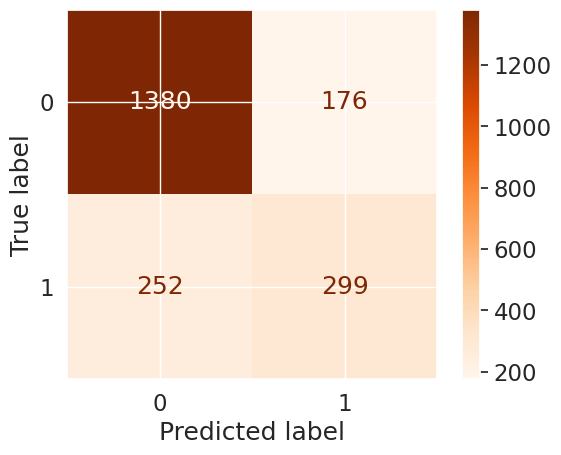

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

## Decision Tree Classifier

Apply decision tree clasification model

In [40]:
# Import Decision tree model:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc_model = DecisionTreeClassifier() # No max_depth specified

In [42]:
# Train the model:
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
# Dtc model predictions:
dtc_predictions = dtc_model.predict(X_test)

### Metrics

In [44]:
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1556
           1       0.48      0.49      0.48       551

    accuracy                           0.73      2107
   macro avg       0.65      0.65      0.65      2107
weighted avg       0.73      0.73      0.73      2107



In [45]:
print("Test data accuracy: ",dtc_model.score(X_test,y_test))
print("Train data accuracy: ", dtc_model.score(X_train, y_train))

Test data accuracy:  0.7285239677266255
Train data accuracy:  0.9971509971509972


### Confusion Matrix

In [46]:
dtc_cm = confusion_matrix(y_test, dtc_predictions)

<Figure size 800x600 with 0 Axes>

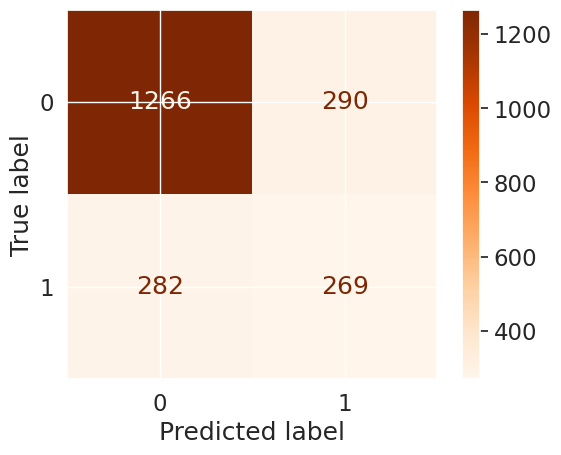

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

## Support Vector Machine

In [48]:
from sklearn.svm import LinearSVC #Import model

In [49]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [50]:
svm_predictions = svm_model.predict(X_test) #predictions

### Metrics

In [51]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1556
           1       0.53      0.70      0.60       551

    accuracy                           0.76      2107
   macro avg       0.70      0.74      0.71      2107
weighted avg       0.79      0.76      0.77      2107



In [52]:
print("Test data accuracy: ",svm_model.score(X_test,y_test))
print("Train data accuracy: ",svm_model.score(X_train, y_train))

Test data accuracy:  0.7593735168485999
Train data accuracy:  0.7678062678062678


### Confusion Matrix

In [53]:
svm_cm = confusion_matrix(y_test, svm_predictions)

<Figure size 800x600 with 0 Axes>

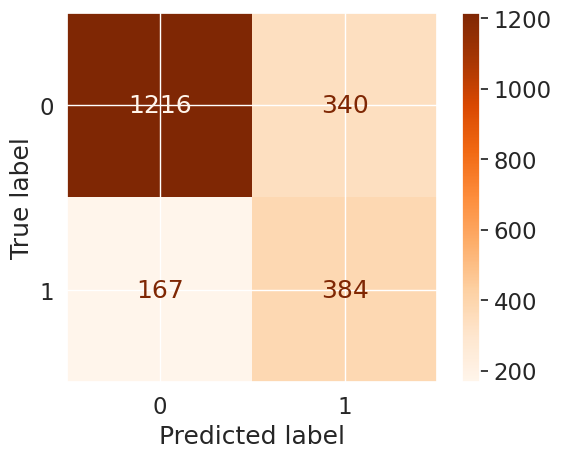

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()

# Models Comparison I

We are going to compare the 3 models metrics to choose the best one.  

Logistic Regression results:


In [55]:
# Define the metrics for each class
lr_data = {
    'class': [0, 1],
    'precision': [0.85, 0.63],
    'recall': [0.89, 0.54],
    'f1-score': [0.87, 0.58],
}

# Create the DataFrame
lr_df = pd.DataFrame(lr_data)
print(lr_df)

   class  precision  recall  f1-score
0      0       0.85    0.89      0.87
1      1       0.63    0.54      0.58


In [56]:
print("Test data accuracy: ",lr_model.score(X_test,y_test))
print("Train data accuracy: ", lr_model.score(X_train, y_train))

Test data accuracy:  0.7968675842429995
Train data accuracy:  0.8046398046398047


Decision Tree Classifier results:

In [57]:
print("Test data accuracy: ",dtc_model.score(X_test,y_test))
print("Train data accuracy: ", dtc_model.score(X_train, y_train))

Test data accuracy:  0.7285239677266255
Train data accuracy:  0.9971509971509972


In [58]:
dtc_data = {
    'class': [0, 1],
    'precision': [0.82, 0.49],
    'recall': [0.82, 0.49],
    'f1-score': [0.82, 0.49],
}

# Create the DataFrame
dtc_df = pd.DataFrame(dtc_data)
print(dtc_df)

   class  precision  recall  f1-score
0      0       0.82    0.82      0.82
1      1       0.49    0.49      0.49


Super Vector Machine results:

In [59]:
svm_data = {
    'class': [0, 1],
    'precision': [0.82, 0.58],
    'recall': [0.88, 0.46],
    'f1-score': [0.85, 0.51],
}

# Create the DataFrame
svm_df = pd.DataFrame(svm_data)
print(svm_df)

   class  precision  recall  f1-score
0      0       0.82    0.88      0.85
1      1       0.58    0.46      0.51


In [60]:
print("Test data accuracy: ",svm_model.score(X_test,y_test))
print("Train data accuracy: ",svm_model.score(X_train, y_train))

Test data accuracy:  0.7593735168485999
Train data accuracy:  0.7678062678062678


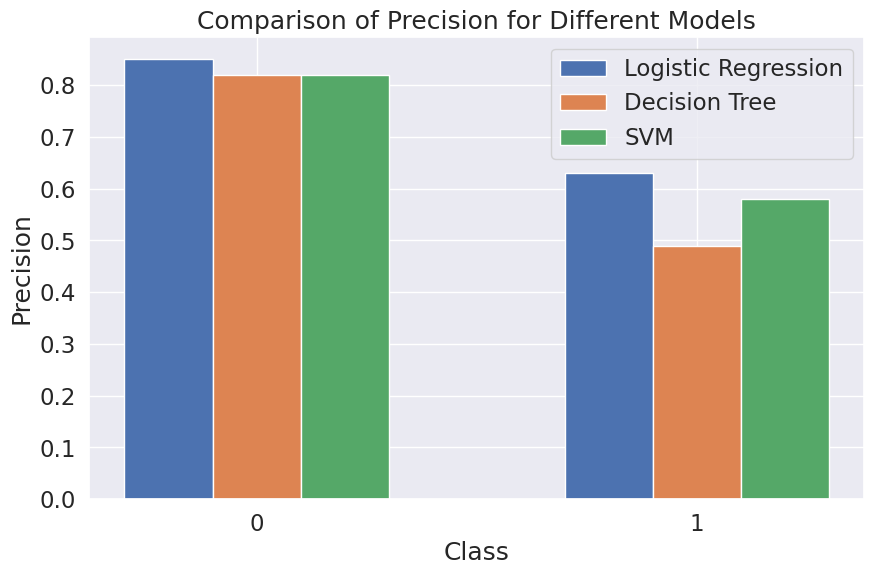

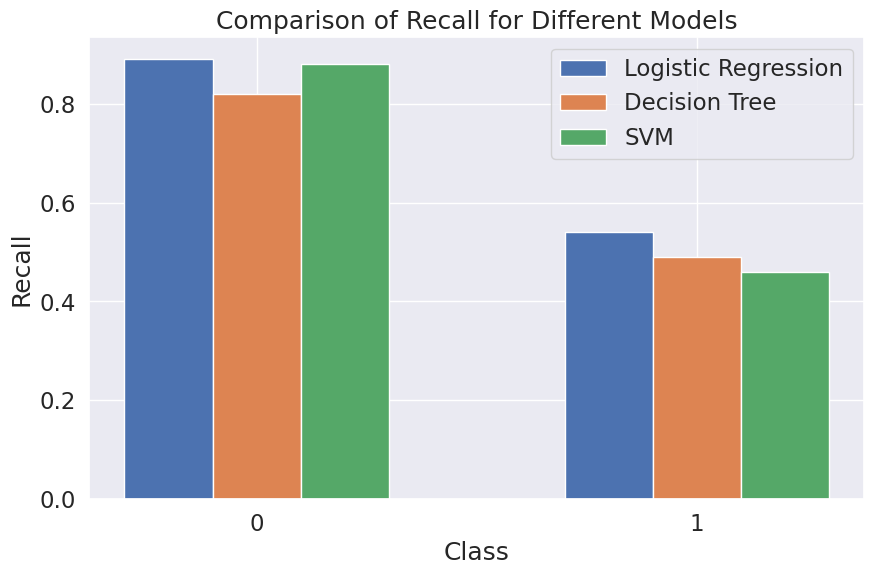

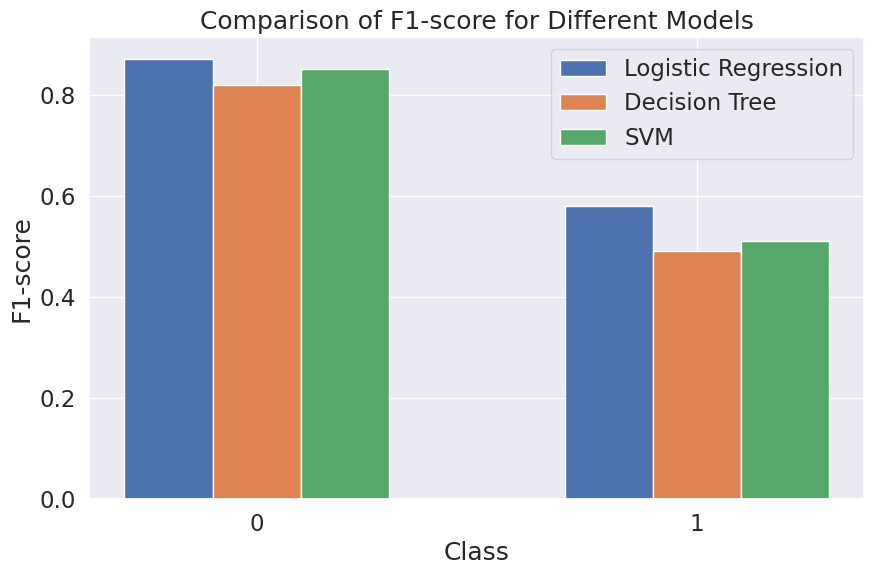

In [61]:
# Function to plot metrics
def plot_metrics(lr_df, dtc_df, svm_df):
    metrics = ['precision', 'recall', 'f1-score']
    classes = [0, 1]
    models = ['Logistic Regression', 'Decision Tree', 'SVM']

    for metric in metrics:
        plt.figure(figsize=(10, 6))
        bar_width = 0.2
        index = pd.Index(range(len(classes)))

        plt.bar(index, lr_df[metric], bar_width, label='Logistic Regression')
        plt.bar(index + bar_width, dtc_df[metric], bar_width, label='Decision Tree')
        plt.bar(index + 2 * bar_width, svm_df[metric], bar_width, label='SVM')

        plt.xlabel('Class')
        plt.ylabel(metric.capitalize())
        plt.title(f'Comparison of {metric.capitalize()} for Different Models')
        plt.xticks(index + bar_width, classes)
        plt.legend()
        plt.show()

# Plot the metrics
plot_metrics(lr_df, dtc_df, svm_df)

# 06 | Machine Learning Models (Up/Oversampling)



If we look at the target distribution we can see and uneven distribution in our target column `churn`:

In [62]:
churn_counts = df.churn.value_counts(normalize=1).round(2)
churn_counts # Imbalanced data

churn
0    0.74
1    0.26
Name: proportion, dtype: float64

## Uneven Data Viz

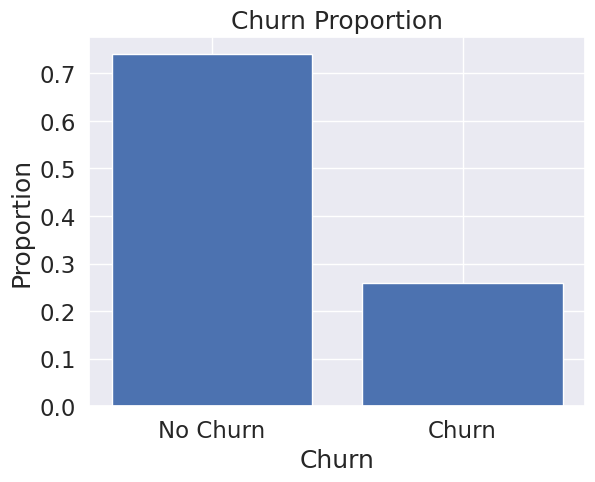

In [63]:
# Churn visualization for uneven distribution:
plt.bar(churn_counts.index, churn_counts.values)

plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.title('Churn Proportion')
plt.xticks([0, 1], ['No Churn', 'Churn'])

plt.show()

In [64]:
# Separating yes/no churn data:
no_churn = df[df['churn']==0]
yes_churn = df[df['churn']==1]
# Displaying churn shape:
print(f"'No' churn data shape before oversampling: {(no_churn.shape)}")
print(f"'Yes' churn data shape before oversampling: {(yes_churn.shape)}")

'No' churn data shape before oversampling: (5164, 20)
'Yes' churn data shape before oversampling: (1857, 20)


**Next Step:**

Upsample the data where churn == Yes, then build machine learning models as before to see if the metrics and results improve, allowing for better predictions.

## SMOTE (OverSampling)

In [65]:
# Import SMOTE:
from imblearn.over_sampling import SMOTE

In [66]:
# Creating X/y split sm
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

In [67]:
# 70/30 split with SMOTE version:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [68]:
# Churn values before Oversampling:
y.value_counts()

churn
0    5164
1    1857
Name: count, dtype: int64

In [69]:
# Data size after Oversampling with SMOTE:
y_sm.value_counts()

churn
0    5164
1    5164
Name: count, dtype: int64

## Logistic Regression (Oversampled)

In [70]:
lr_model_2 = LogisticRegression()

In [71]:
# Training the model:
lr_model_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [72]:
# Model validation:
lr_predictions_2 = lr_model_2.predict(X_test_2)

In [73]:
print(f'30% for test prediction data: {len(lr_predictions_2)}.')

30% for test prediction data: 3099.


### Metrics:

In [74]:
print(classification_report(y_test_2, lr_predictions_2))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1586
           1       0.74      0.86      0.80      1513

    accuracy                           0.79      3099
   macro avg       0.79      0.79      0.79      3099
weighted avg       0.79      0.79      0.79      3099



### Confusion Matrix

In [75]:
lr_cm_2 = confusion_matrix(y_test_2, lr_predictions_2)

<Figure size 800x600 with 0 Axes>

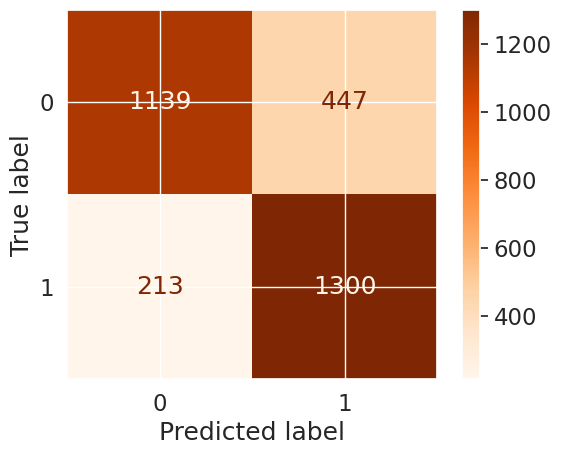

In [76]:
disp_2 = ConfusionMatrixDisplay(confusion_matrix=lr_cm_2)
plt.figure(figsize=(8, 6))
disp_2.plot(cmap='Oranges')
plt.grid(True)
plt.show()

## Random Forest Classifier (Oversampled)

In [77]:
# Import random forest classifier:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf_model_2 = RandomForestClassifier()

In [79]:
# Training the model:
rf_model_2.fit(X_train_2, y_train_2)

RandomForestClassifier()

In [80]:
# Model validation:
rf_predictions_2 = rf_model_2.predict(X_test_2)

In [81]:
print(f'30% for test prediction data: {len(rf_predictions_2)}.')

30% for test prediction data: 3099.


### Metrics

In [82]:
print(classification_report(y_test_2, rf_predictions_2))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1586
           1       0.84      0.85      0.84      1513

    accuracy                           0.85      3099
   macro avg       0.85      0.85      0.85      3099
weighted avg       0.85      0.85      0.85      3099



### Confusion Matrix

In [83]:
rf_cm_2 = confusion_matrix(y_test_2, rf_predictions_2)

<Figure size 800x600 with 0 Axes>

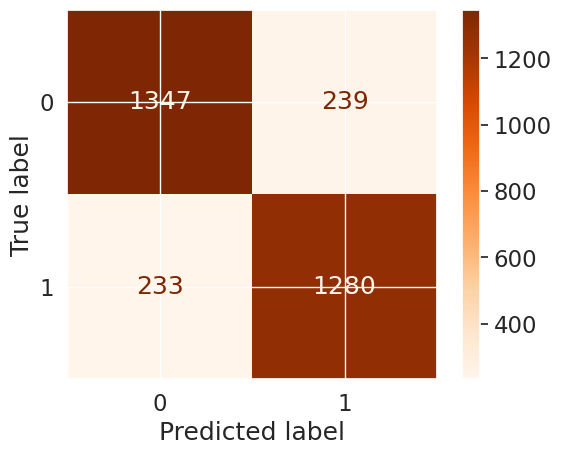

In [84]:
disp_2 = ConfusionMatrixDisplay(confusion_matrix=rf_cm_2)
plt.figure(figsize=(8, 6))
disp_2.plot(cmap='Oranges')
plt.grid(True)
plt.show()

# Models Comparison II

Comparing results for Logistic regression and Random Forest with Oversampled data.

Logistic Regression (Oversampled) results in DataFrame:

In [85]:
# Logistic Regresion results (Oversampled)
lr_data_2 = {
    'class': [0, 1],
    'precision': [0.84, 0.74],
    'recall': [0.71, 0.86],
    'f1-score': [0.77, 0.80],
}

# Create the DataFrame
lr_df_2 = pd.DataFrame(lr_data_2)
print(lr_df_2)

   class  precision  recall  f1-score
0      0       0.84    0.71      0.77
1      1       0.74    0.86      0.80


In [86]:
# Logistic Regression results after oversampling:
print("Test data accuracy: ",lr_model_2.score(X_test_2,y_test_2))
print("Train data accuracy: ", lr_model_2.score(X_train_2, y_train_2))

Test data accuracy:  0.78702807357212
Train data accuracy:  0.7988656799004011


Random Forest Classifier (Oversampled) results in DataFrame:

In [87]:
rf_data = {
    'class': [0, 1],
    'precision': [0.86, 0.84],
    'recall': [0.84, 0.86],
    'f1-score': [0.85, 0.85],
}

# Create the DataFrame
rf_df = pd.DataFrame(rf_data)
print(rf_df)

   class  precision  recall  f1-score
0      0       0.86    0.84      0.85
1      1       0.84    0.86      0.85


In [88]:
print("Test data accuracy: ",rf_model_2.score(X_test_2,y_test_2))
print("Train data accuracy: ",rf_model_2.score(X_train_2, y_train_2))

Test data accuracy:  0.8476928041303646
Train data accuracy:  0.9986166828053673


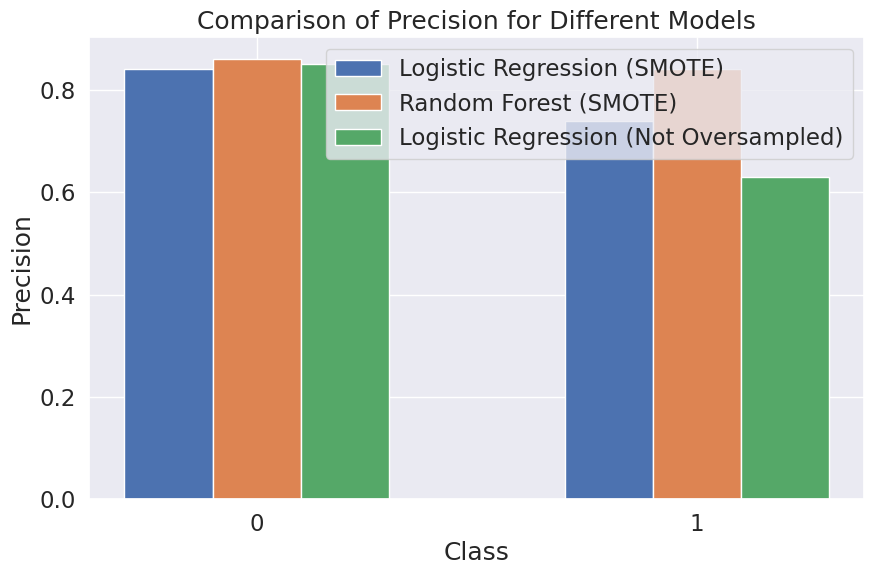

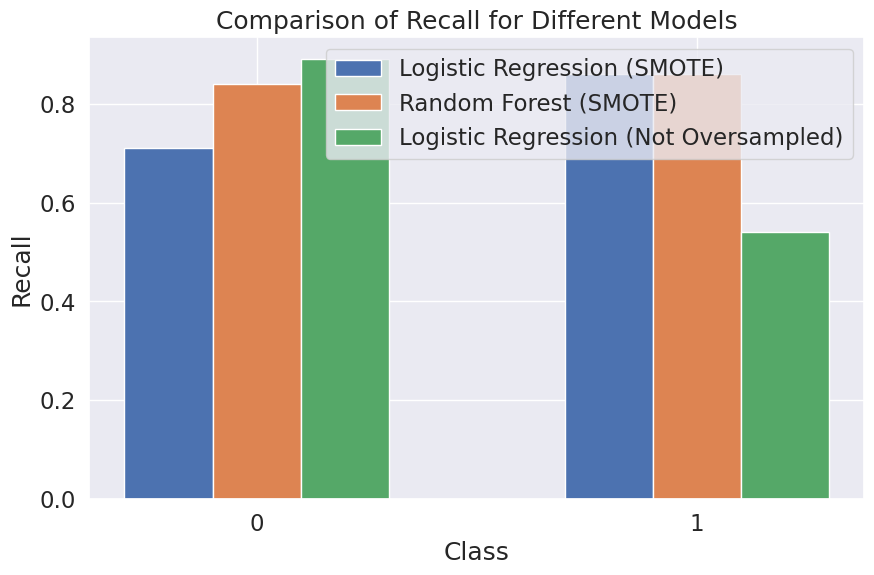

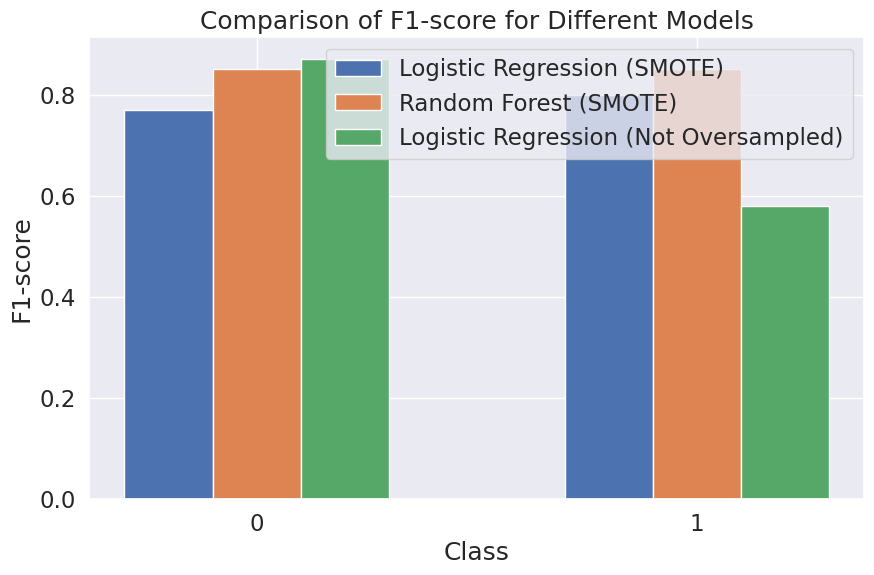

In [89]:
# Function to plot metrics
def plot_metrics(lr_df_2, rf_df, lr_df):
    metrics = ['precision', 'recall', 'f1-score']
    classes = [0, 1]
    models = ['Logistic Regression (SMOTE)', 'Random Forest (SMOTE)', 'Logistic Regression (Not Oversampled)']

    for metric in metrics:
        plt.figure(figsize=(10, 6))
        bar_width = 0.2
        index = pd.Index(range(len(classes)))

        plt.bar(index, lr_df_2[metric], bar_width, label='Logistic Regression (SMOTE)')
        plt.bar(index + bar_width, rf_df[metric], bar_width, label='Random Forest (SMOTE)')
        plt.bar(index + 2 * bar_width, lr_df[metric], bar_width, label='Logistic Regression (Not Oversampled)')

        plt.xlabel('Class')
        plt.ylabel(metric.capitalize())
        plt.title(f'Comparison of {metric.capitalize()} for Different Models')
        plt.xticks(index + bar_width, classes)
        plt.legend()
        plt.show()

# Plot the metrics
plot_metrics(lr_df_2, rf_df, lr_df)

# ROC Curve

Testing ROC Curve visualization in the Oversampled Models:

Logistic Regression (Oversampled)

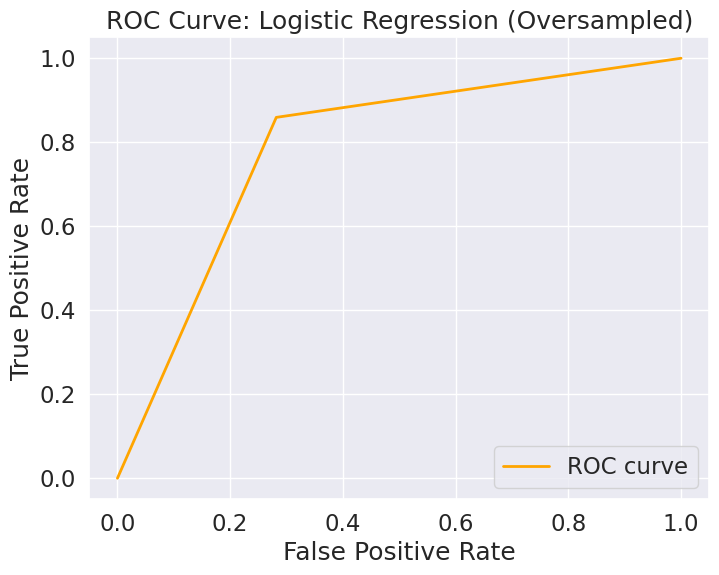

In [90]:
fpr, tpr, thresholds = roc_curve(y_test_2, lr_predictions_2, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression (Oversampled)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

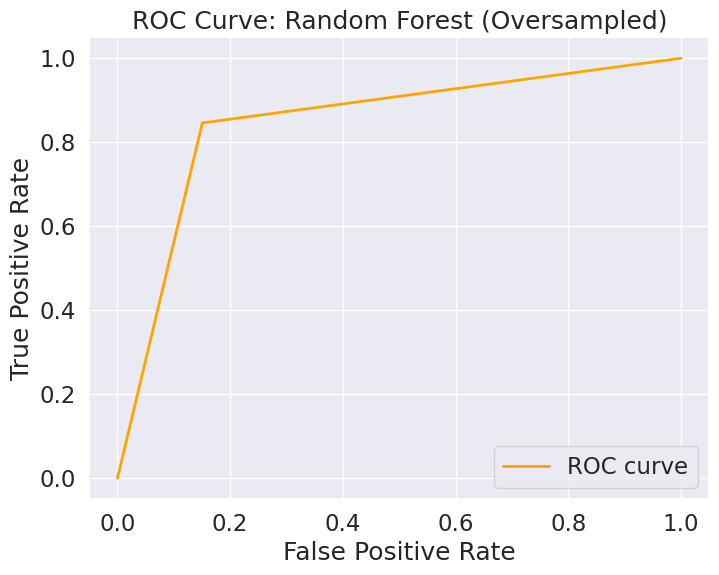

In [91]:
fpr, tpr, thresholds = roc_curve(y_test_2, rf_predictions_2, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest (Oversampled)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()